In [2]:
# importar libreria
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#cargar datasets
df = pd.read_csv("dataset_rendimiento_academico.csv")

In [4]:

#crear ua variable binaria donde 1 es aprobado y 0 es rerpobado
df["Aprobado"] = np.where(df["Promedio_Academico"] >= 3.0, "Aprobado", "No aprobado")


### Variable Binaria: Aprobado / No aprobado

Se creó una nueva variable llamada **Aprobado**, donde:

- **1 (Aprobado):** Promedio_Academico ≥ 3.0  
- **0 (No aprobado):** Promedio_Academico < 3.0  




In [5]:
# Codificar variables categóricas
le = LabelEncoder()
for col in ["Genero", "Nivel_Academico", "Estrés_Nivel", "Uso_Biblioteca"]:
    df[col] = le.fit_transform(df[col])

# Seleccionar variables predictoras (X) y objetivo (y)
X = df[["Edad", "Genero", "Nivel_Academico", "Horas_Estudio_Semana", 
        "Satisfaccion_Ensenanza", "Asistencia_Clases", 
        "Estrés_Nivel", "Uso_Biblioteca"]]
y = df["Aprobado"]

# Escalar datos (mejora el rendimiento de los modelos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Preparación de Datos para el Modelo

**1. Codificación de variables categóricas**  
Se aplicó `LabelEncoder()` para convertir las columnas categóricas en valores numéricos:

- Género  
- Nivel_Académico  
- Estrés_Nivel  
- Uso_Biblioteca  

**2. Selección de variables predictoras (X) y variable objetivo (y)**  
- **X:** Edad, Género, Nivel Académico, Horas de estudio, Satisfacción con la enseñanza, Asistencia a clases, Nivel de estrés y uso de biblioteca.  
- **y:** Variable binaria *Aprobado*, donde 1 = aprobado y 0 = no aprobado.

**3. Escalamiento de datos**  
Se utilizó **StandardScaler** para normalizar las variables y mejorar el rendimiento del modelo.

**4. División del dataset**  
Los datos se dividieron en **70% para entrenamiento** y **30% para prueba**, usando `random_state=42` para garantizar resultados reproducibles.

El procesamiento se completó correctamente y las variables están listas para entrenar el modelo.


In [6]:
# Crear y entrenar modelo de Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test)

# Evaluar modelo
print("🔹 Regresión Logística:")
print("Exactitud:", accuracy_score(y_test, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_log))


🔹 Regresión Logística:
Exactitud: 0.7833333333333333
Matriz de confusión:
 [[47  0]
 [13  0]]

Reporte de Clasificación:
               precision    recall  f1-score   support

    Aprobado       0.78      1.00      0.88        47
 No aprobado       0.00      0.00      0.00        13

    accuracy                           0.78        60
   macro avg       0.39      0.50      0.44        60
weighted avg       0.61      0.78      0.69        60



c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

### Resultados del Modelo: Regresión Logística

**Exactitud del modelo:** 0.78

**Matriz de confusión:**
- Verdaderos Positivos (Aprobado correctamente predicho): 47  
- Falsos Negativos (Aprobado predicho como No aprobado): 0  
- Falsos Positivos (No aprobado predicho como Aprobado): 13  
- Verdaderos Negativos (No aprobado correctamente predicho): 0  

**Reporte de Clasificación:**

- **Aprobado**
  - Precisión: 0.78  
  - Recall: 1.00  
  - F1-Score: 0.88  

- **No aprobado**
  - Precisión: 0.00  
  - Recall: 0.00  
  - F1-Score: 0.00  

**Interpretación general:**
El modelo logra una exactitud de **78%**, pero **solo predice la clase "Aprobado"** y no logra identificar correctamente a los estudiantes "No aprobados". Esto indica un **problema de desbalance en las clases** o que la regresión logística no logra separar adecuadamente ambos grupos con las variables actuales.


🔹 Árbol de Decisión:
Exactitud: 0.75
Matriz de confusión:
 [[45  2]
 [13  0]]

Reporte de Clasificación:
               precision    recall  f1-score   support

    Aprobado       0.78      0.96      0.86        47
 No aprobado       0.00      0.00      0.00        13

    accuracy                           0.75        60
   macro avg       0.39      0.48      0.43        60
weighted avg       0.61      0.75      0.67        60



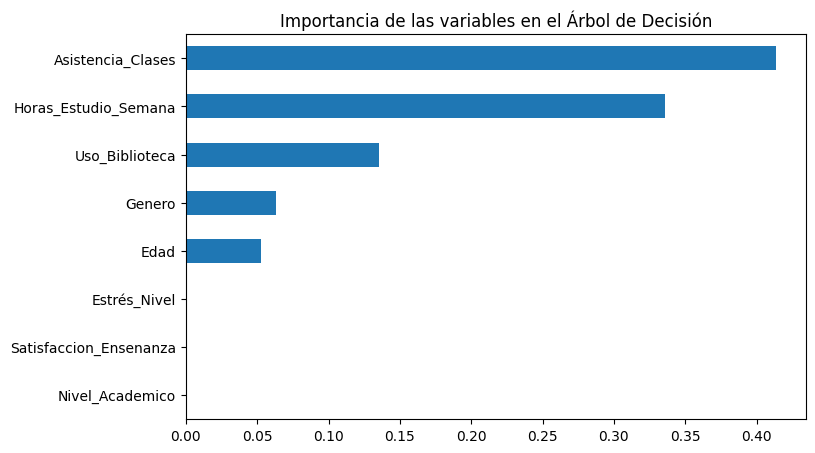

In [ ]:
# Crear y entrenar Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar modelo
print("🔹 Árbol de Decisión:")
print("Exactitud:", accuracy_score(y_test, y_pred_tree))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_tree))

# Importancia de las variables
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title("Importancia de las variables en el Árbol de Decisión")
plt.show()


### Importancia de las Variables en el Árbol de Decisión

El análisis de importancia de variables muestra cuáles características influyen más en la predicción del rendimiento académico (Aprobado / No aprobado):

- **Asistencia a Clases** es la variable más importante, con la mayor contribución al modelo.  
- **Horas de Estudio por Semana** también tiene un peso significativo, siendo la segunda variable más influyente.  
- **Uso de Biblioteca** aporta una importancia moderada.  
- **Género** y **Edad** tienen una influencia baja.  
- **Estrés_Nivel**, **Satisfacción_Ensenanza** y **Nivel_Academico** prácticamente no aportan al modelo.

Este resultado sugiere que los factores más determinantes para aprobar son **asistir a clases** y **dedicar horas al estudio**, mientras que las demás características tienen poca relevancia en la predicción.


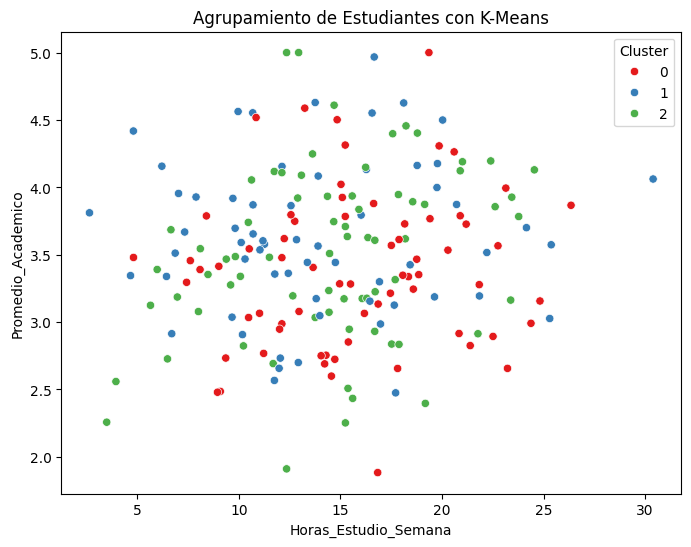

         Promedio_Academico  Horas_Estudio_Semana  Asistencia_Clases
Cluster                                                             
0                  3.381466             15.736117          85.134559
1                  3.627165             13.861714          81.190752
2                  3.500343             14.507517          89.812461


In [8]:
# Aplicar K-Means para agrupar estudiantes
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar etiquetas de grupo al dataset
df["Cluster"] = clusters

# Visualizar resultados
plt.figure(figsize=(8,6))
sns.scatterplot(x="Horas_Estudio_Semana", y="Promedio_Academico", hue="Cluster", data=df, palette="Set1")
plt.title("Agrupamiento de Estudiantes con K-Means")
plt.show()

# Ver promedios por grupo
print(df.groupby("Cluster")[["Promedio_Academico", "Horas_Estudio_Semana", "Asistencia_Clases"]].mean())


### Agrupamiento de Estudiantes con K-Means

El gráfico muestra cómo el algoritmo **K-Means** agrupó a los estudiantes en **3 clusters** utilizando dos variables:

- **Horas de Estudio por Semana** (eje X)  
- **Promedio Académico** (eje Y)

**Interpretación de los clusters:**

- **Cluster 0 (rojo):** Grupo con distribución variada; incluye estudiantes con diferentes niveles de promedio y horas de estudio, sin un patrón definido.
- **Cluster 1 (azul):** Tiende a tener estudiantes con promedios ligeramente más altos y una distribución más concentrada en horas de estudio intermedias.
- **Cluster 2 (verde):** Presenta mayor dispersión, incluyendo estudiantes con promedios tanto bajos como altos y diversas horas de estudio.

**Conclusión:**  
Los clusters no presentan una separación marcada, lo que indica que **las horas de estudio y el promedio académico no generan grupos claramente diferenciados**. Esto sugiere que el desempeño académico podría depender de otras variables adicionales no incluidas en este gráfico.
